In [18]:
import pandas as pd

import glob
import datetime

from matplotlib import pyplot as plt
# plt.style.use('dark_background')

user input

In [19]:
start_time = datetime.time(6, 0)
end_time   = datetime.time(18, 0)

load all files

In [20]:
files = glob.glob('.\\data\\*.csv')

data_set = []

for file in files:
# file = files[-1]

    data = pd.read_csv(file)

    data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.time

    name = file[-6:-4] + '.' + file[-8:-6] + '.' + file[-12:-8]


    data[name] = data['Power / W']

    data = data[['Time',name]]    # retain only relevant columns

    data_set.append(data)

merge all data sets

In [21]:
power = data_set[0]
for i in range(1, len(data_set)):
    power = power.merge(data_set[i], on='Time')

filter time

In [22]:
power = power[power['Time'].between(start_time, end_time)]

clean up index

In [23]:
power['Time'] = power['Time'].apply(
    lambda t: datetime.datetime.combine(datetime.date.today(), t) )

power.set_index('Time', inplace=True)

statistics

In [24]:
power['median'] = power.median(axis=1)
power['min']    = power.min(axis=1)
power['max']    = power.max(axis=1)

plot power

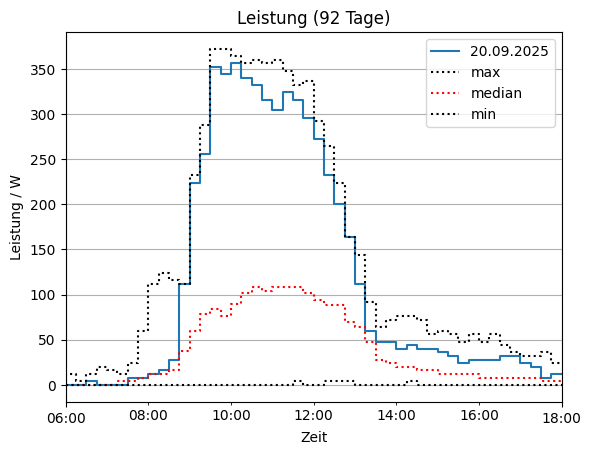

In [25]:
power.plot(y=[name,'max','median','min'], style=['-','k:','r:','k:'], drawstyle='steps-pre', 
           title=f'Leistung ({len(data_set)} Tage)', ylabel='Leistung / W', xlabel='Zeit', grid=True)
plt.show()

# power.plot(drawstyle='steps-pre', title='power generation of solar plant', ylabel='power', xlabel='time')
# plt.gca().set_yticks([])
# plt.savefig('power_generation.png', dpi=300, bbox_inches='tight', transparent=True)

energy

In [26]:
energy = power.cumsum() * 0.25  # convert to Wh
energy = energy.iloc[-1,:-3]
energy.index = pd.to_datetime(energy.index, format='%d.%m.%Y', errors='coerce').date

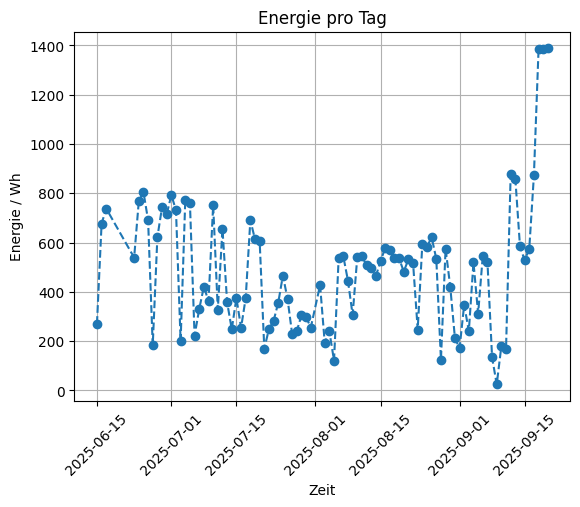

In [27]:
energy.plot(style = 'o--', title='Energie pro Tag', ylabel='Energie / Wh', xlabel='Zeit', rot=45, grid=True)
plt.show()